<a href="https://colab.research.google.com/github/hellosanjeev/Air-BNB/blob/main/NN_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sukamal/DL 11:30/iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df["species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [ ]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [ ]:
X = df.drop("species",axis=1)
y = df["species"]

In [ ]:
pc = PCA(n_components=2,random_state=1)
components = pc.fit_transform(X,y)

In [ ]:
pc1 = components[:,0]
pc2 = components[:,1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


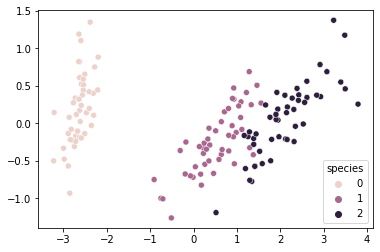

In [ ]:
sns.scatterplot(pc1,pc2,hue=y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
# Neural network

model = Sequential()
model.add(Dense(32, input_dim=4, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy")

In [ ]:
trained_model = model.fit(X_train_ss,y_train,epochs=25,batch_size=16)

Epoch 1/25
7/7 [==============================] - 0s 2ms/step - loss: 1.1244
Epoch 2/25
7/7 [==============================] - 0s 2ms/step - loss: 1.0255
Epoch 3/25
7/7 [==============================] - 0s 2ms/step - loss: 0.9462
Epoch 4/25
7/7 [==============================] - 0s 2ms/step - loss: 0.8642
Epoch 5/25
7/7 [==============================] - 0s 2ms/step - loss: 0.7702
Epoch 6/25
7/7 [==============================] - 0s 2ms/step - loss: 0.6705
Epoch 7/25
7/7 [==============================] - 0s 3ms/step - loss: 0.5743
Epoch 8/25
7/7 [==============================] - 0s 2ms/step - loss: 0.4797
Epoch 9/25
7/7 [==============================] - 0s 2ms/step - loss: 0.3933
Epoch 10/25
7/7 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 11/25
7/7 [==============================] - 0s 3ms/step - loss: 0.2770
Epoch 12/25
7/7 [==============================] - 0s 3ms/step - loss: 0.2346
Epoch 13/25
7/7 [==============================] - 0s 3ms/step - loss: 0.

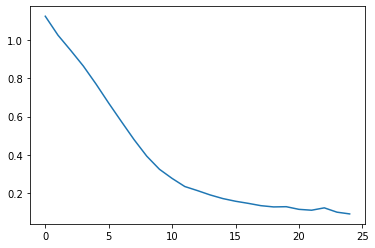

In [ ]:
plt.plot(trained_model.history['loss'])

In [ ]:
y_pred = model.predict(X_test_ss)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

